In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [10]:
dataset = pd.read_csv("data/Most Popular Programming Languages from 2004 to 2020 V3.csv")
dataset.head()

,Date,Abap,Ada,C/C++,C#,Cobol,Dart,Delphi,Go,Groovy,...,PHP,Python,R,Ruby,Rust,Scala,Swift,TypeScript,VBA,Visual Basic
0,July 2004,0.34,0.36,10.08,4.71,0.43,0.0,2.82,0.0,0.03,...,18.75,2.53,0.39,0.33,0.08,0.03,0.0,0.0,1.44,8.56
1,August 2004,0.36,0.36,9.81,4.99,0.46,0.0,2.67,0.0,0.07,...,19.26,2.64,0.41,0.40,0.09,0.03,0.0,0.0,1.46,8.57
2,September 2004,0.41,0.41,9.63,5.06,0.51,0.0,2.65,0.0,0.08,...,19.49,2.72,0.40,0.41,0.10,0.03,0.0,0.0,1.55,8.41
3,October 2004,0.40,0.38,9.50,5.31,0.53,0.0,2.77,0.0,0.09,...,19.34,2.92,0.42,0.46,0.11,0.04,0.0,0.0,1.61,8.49
4,November 2004,0.38,0.38,9.52,5.24,0.55,0.0,2.76,0.0,0.07,...,19.43,2.84,0.41,0.45,0.13,0.04,0.0,0.0,1.50,8.24


In [11]:
dataset.shape

(198, 29)

In [12]:
dataset.dtypes

Date             object
Abap            float64
Ada             float64
C/C++           float64
C#              float64
Cobol           float64
Dart            float64
Delphi          float64
Go              float64
Groovy          float64
Haskell         float64
Java            float64
JavaScript      float64
Julia           float64
Kotlin          float64
Lua             float64
Matlab          float64
Objective-C     float64
Perl            float64
PHP             float64
Python          float64
R               float64
Ruby            float64
Rust            float64
Scala           float64
Swift           float64
TypeScript      float64
VBA             float64
Visual Basic    float64
dtype: object

In [13]:
dataset["Date"] = pd.to_datetime(dataset["Date"])
dataset.set_index("Date", inplace=True)
dataset

,Abap,Ada,C/C++,C#,Cobol,Dart,Delphi,Go,Groovy,Haskell,...,PHP,Python,R,Ruby,Rust,Scala,Swift,TypeScript,VBA,Visual Basic
Date,,,,,,,,,,,,,,,,,,,,,
2004-07-01,0.34,0.36,10.08,4.71,0.43,0.00,2.82,0.00,0.03,0.22,...,18.75,2.53,0.39,0.33,0.08,0.03,0.00,0.00,1.44,8.56
2004-08-01,0.36,0.36,9.81,4.99,0.46,0.00,2.67,0.00,0.07,0.20,...,19.26,2.64,0.41,0.40,0.09,0.03,0.00,0.00,1.46,8.57
2004-09-01,0.41,0.41,9.63,5.06,0.51,0.00,2.65,0.00,0.08,0.21,...,19.49,2.72,0.40,0.41,0.10,0.03,0.00,0.00,1.55,8.41
2004-10-01,0.40,0.38,9.50,5.31,0.53,0.00,2.77,0.00,0.09,0.20,...,19.34,2.92,0.42,0.46,0.11,0.04,0.00,0.00,1.61,8.49
2004-11-01,0.38,0.38,9.52,5.24,0.55,0.00,2.76,0.00,0.07,0.24,...,19.43,2.84,0.41,0.45,0.13,0.04,0.00,0.00,1.50,8.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,0.44,0.48,5.68,6.64,0.37,0.49,0.24,1.45,0.41,0.28,...,5.77,31.73,4.05,1.21,1.05,0.97,2.45,1.68,1.23,0.76
2020-09-01,0.42,0.53,5.62,6.45,0.38,0.51,0.24,1.48,0.41,0.30,...,5.79,31.60,4.08,1.20,1.13,0.98,2.55,1.66,1.13,0.72
2020-10-01,0.38,0.61,5.76,6.39,0.37,0.54,0.23,1.49,0.39,0.28,...,5.69,31.21,4.10,1.21,1.16,0.91,2.49,1.63,1.09,0.71


In [14]:
popular_2004 = pd.DataFrame({"Languages": dataset.iloc[0].T.index,
                            "Popularity": dataset.iloc[0].values.T})

popular_2020 = pd.DataFrame({"Languages": dataset.iloc[197].T.index,
                            "Popularity": dataset.iloc[197].values.T})

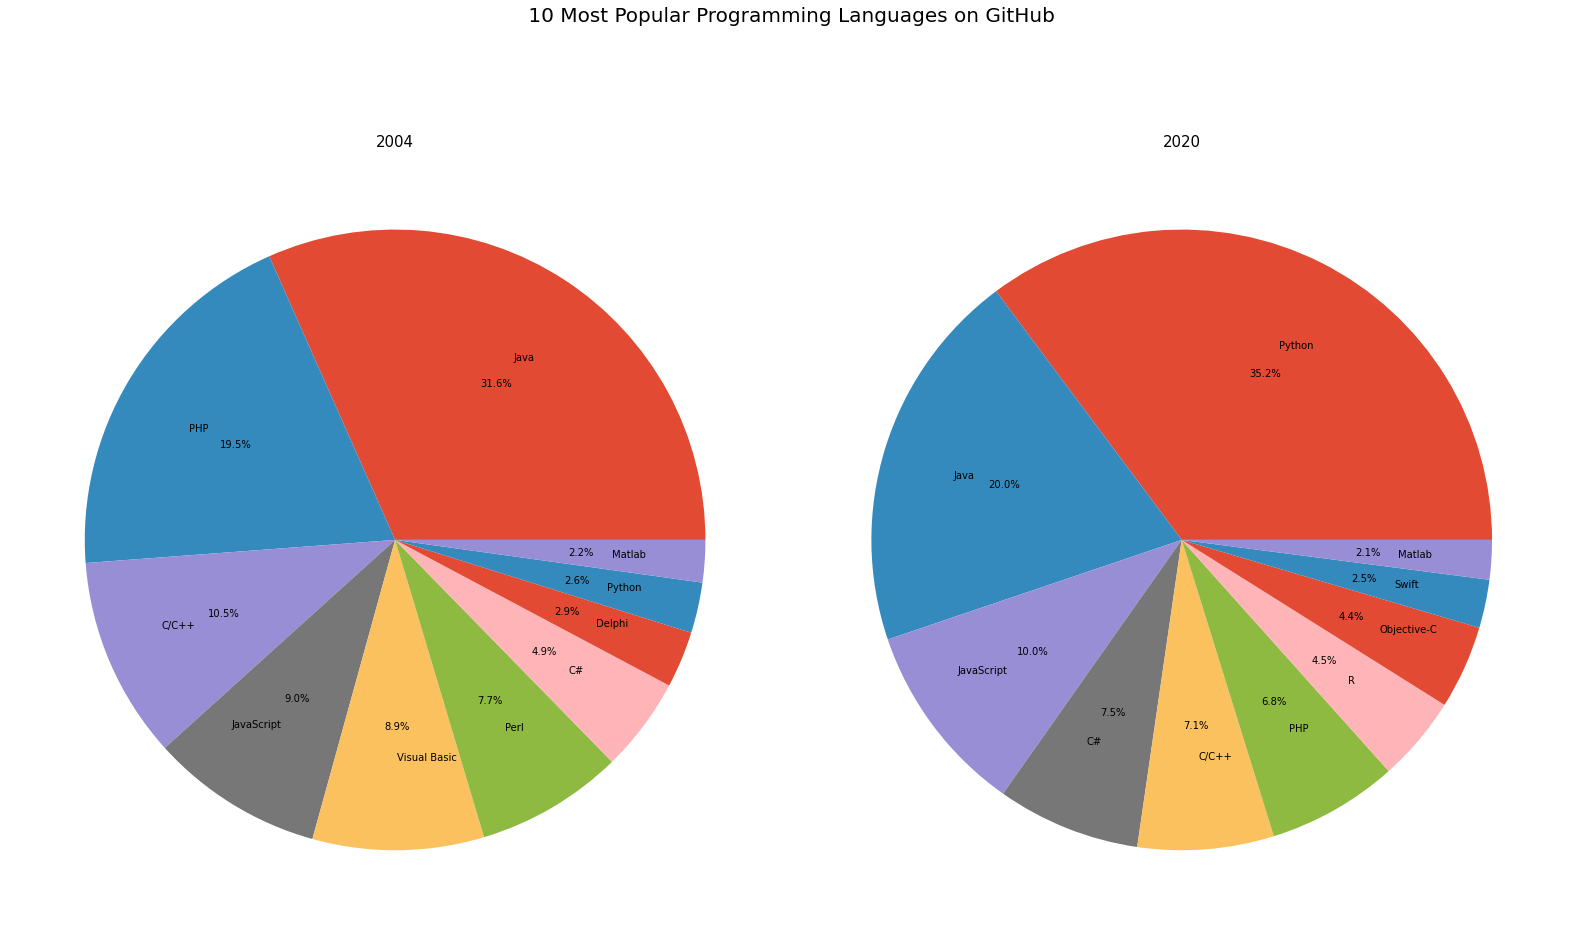

In [15]:
fig, ax = plt.subplots(1,2, figsize=(22,15))
plt.suptitle(" 10 Most Popular Programming Languages on GitHub",fontsize=20)

ax[0].pie(popular_2004.nlargest(10,"Popularity").Popularity.values, autopct='%1.1f%%',
            labels=popular_2004.nlargest(10,"Popularity").Languages.values, labeldistance=0.7)
ax[0].set_title("2004",fontsize=15)

ax[1].pie(popular_2020.nlargest(10,"Popularity").Popularity.values, autopct='%1.1f%%',
            labels=popular_2020.nlargest(10,"Popularity").Languages.values, labeldistance=0.7)
ax[1].set_title("2020",fontsize=15)

plt.tight_layout()
plt.show()

<AxesSubplot:>

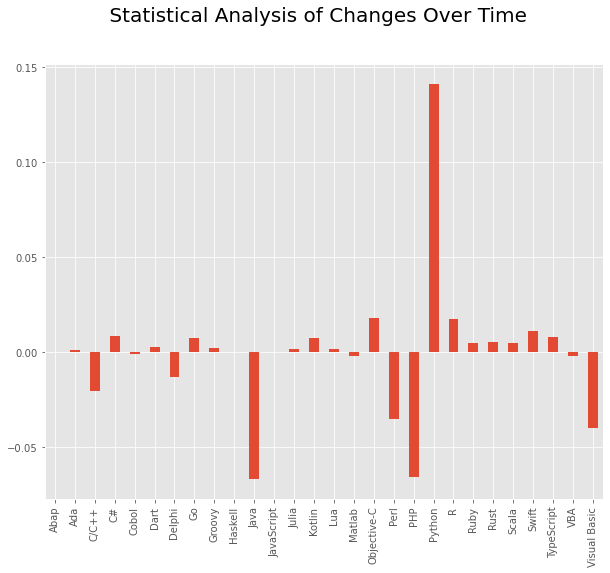

In [16]:
#provides the absolute changes between two index values 
plt.suptitle(" Statistical Analysis of Changes Over Time",fontsize=20)
dataset.diff().mean().plot(kind='bar',figsize=(10,8))

<AxesSubplot:>

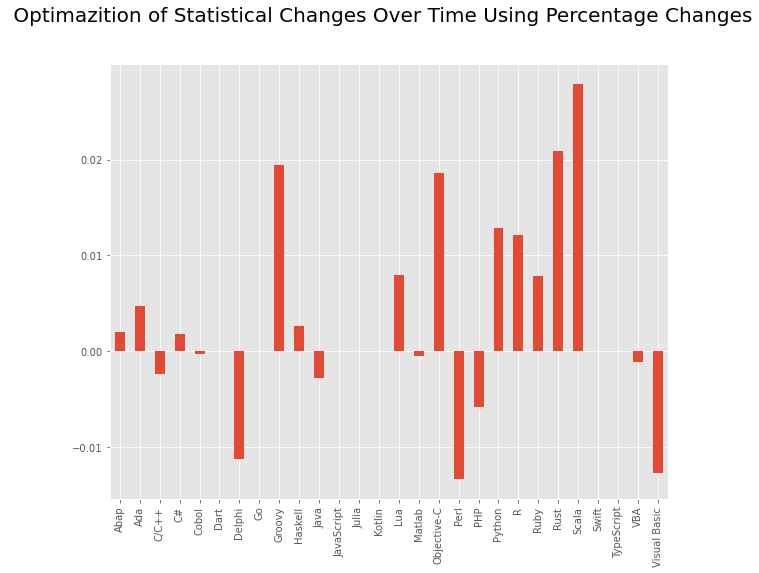

In [17]:
#calculates the percentage change between two index values
plt.suptitle(" Optimazition of Statistical Changes Over Time Using Percentage Changes",fontsize=20)
dataset.pct_change().mean().plot(kind='bar',figsize=(10,8))

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [19]:
dataset2 = pd.read_csv("data/Popular Programming Language2.csv")
dataset2.head()

,Date,Fortran,COBOL,ALGOL,Assembly,BASIC,Lisp,APL,Pascal,C,...,Delphi,PHP,C#,Python,Ruby,Matlab,Objective C,R,Swift,Kotlin
0,1965,58.18,13.5,10.32,5.38,2.00,1.48,1.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1969,24.82,6.8,5.61,4.63,3.88,2.31,4.33,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
dataset2.shape

(55, 26)

In [21]:
dataset2.dtypes

Date              int64
Fortran         float64
COBOL           float64
ALGOL           float64
Assembly        float64
BASIC           float64
Lisp            float64
APL             float64
Pascal          float64
C               float64
Ada             float64
C++             float64
Visual Basic    float64
Perl            float64
JavaScript      float64
Java            float64
Delphi          float64
PHP             float64
C#              float64
Python          float64
Ruby            float64
Matlab          float64
Objective C     float64
R               float64
Swift           float64
Kotlin          float64
dtype: object

In [22]:
dataset2["Date"] = pd.to_datetime(dataset2["Date"])
dataset2.set_index("Date", inplace=True)
dataset2

,Fortran,COBOL,ALGOL,Assembly,BASIC,Lisp,APL,Pascal,C,Ada,...,Delphi,PHP,C#,Python,Ruby,Matlab,Objective C,R,Swift,Kotlin
Date,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000001965,58.18,13.50,10.32,5.38,2.00,1.48,1.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000001966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000001967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000001968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000001969,24.82,6.80,5.61,4.63,3.88,2.31,4.33,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000001970,24.73,6.60,4.68,4.88,4.04,3.32,4.12,0.73,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000001971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000001972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000001973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
popular_1965 = pd.DataFrame({"Languages": dataset2.iloc[0].T.index,
                            "Popularity": dataset2.iloc[0].values.T})

popular_2019 = pd.DataFrame({"Languages": dataset2.iloc[54].T.index,
                            "Popularity": dataset2.iloc[54].values.T})

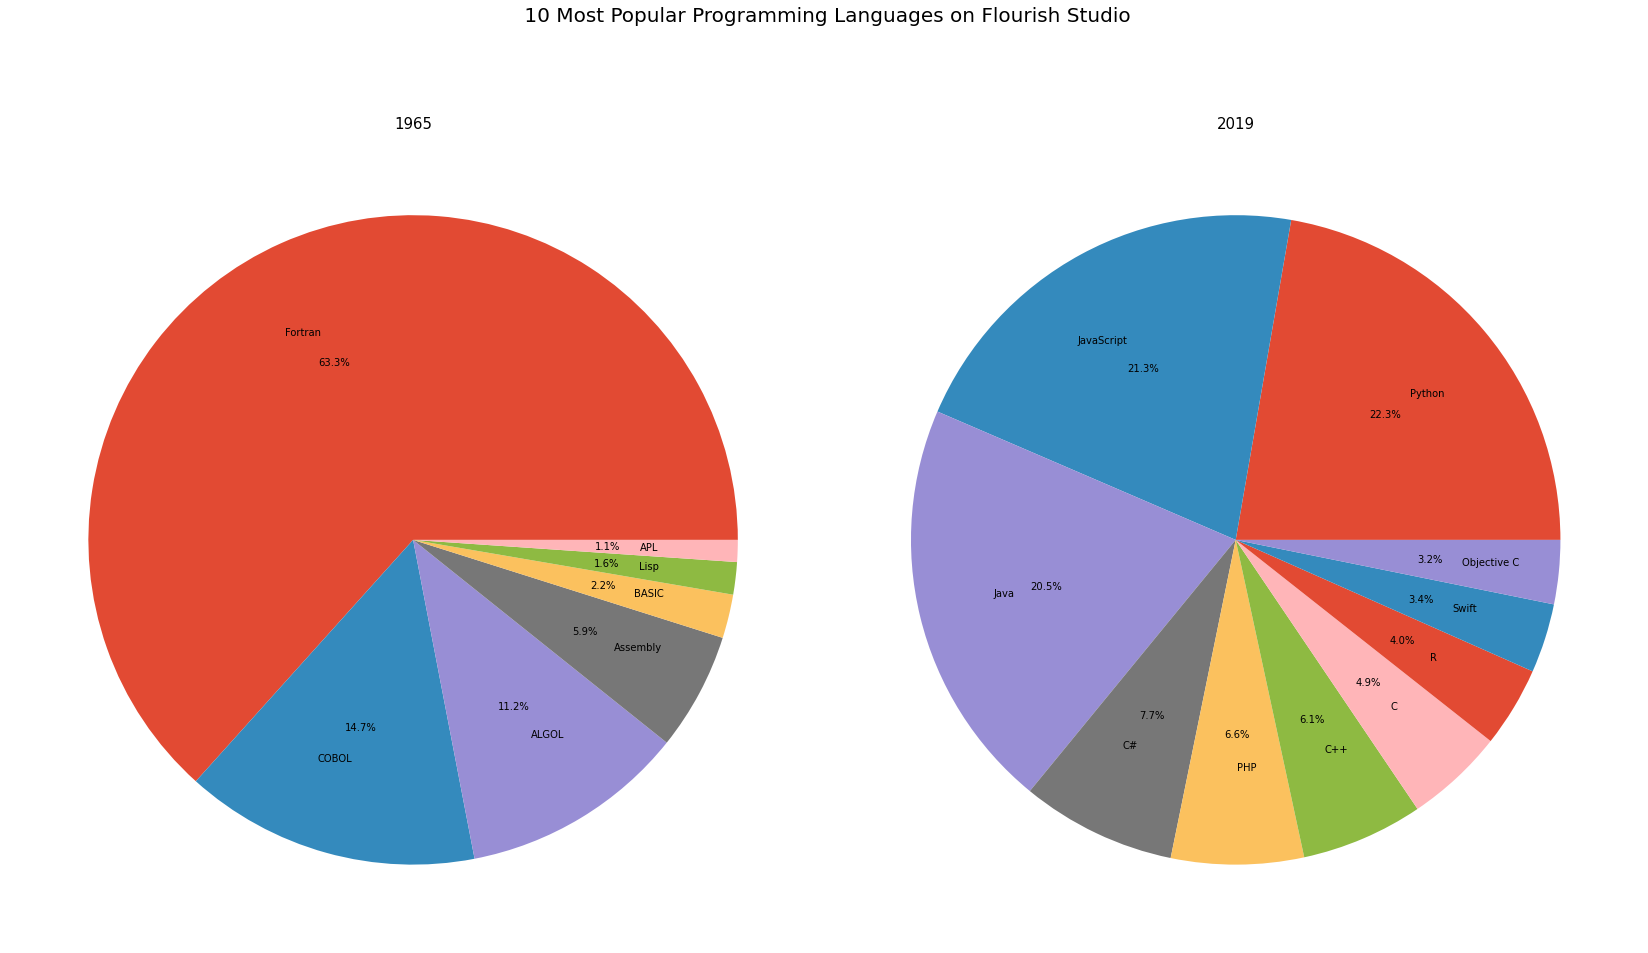

In [24]:
fig, ax = plt.subplots(1,2, figsize=(23,15))
plt.suptitle(" 10 Most Popular Programming Languages on Flourish Studio",fontsize=20)

ax[0].pie(popular_1965.nlargest(10,"Popularity").Popularity.values, autopct='%1.1f%%',
            labels=popular_1965.nlargest(10,"Popularity").Languages.values, labeldistance=0.7)
ax[0].set_title("1965",fontsize=15)

ax[1].pie(popular_2019.nlargest(10,"Popularity").Popularity.values, autopct='%1.1f%%',
            labels=popular_2019.nlargest(10,"Popularity").Languages.values, labeldistance=0.7)
ax[1].set_title("2019",fontsize=15)

plt.tight_layout()
plt.show()

<AxesSubplot:>

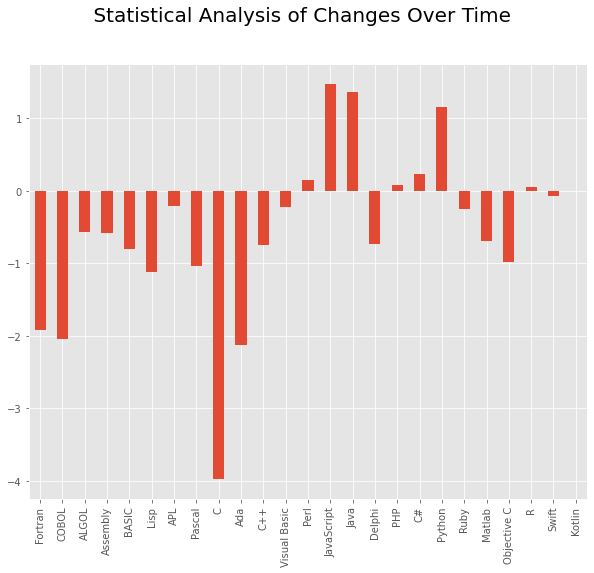

In [25]:
#provides the absolute changes between two index values 
plt.suptitle(" Statistical Analysis of Changes Over Time",fontsize=20)
dataset2.diff().mean().plot(kind='bar',figsize=(10,8))

<AxesSubplot:>

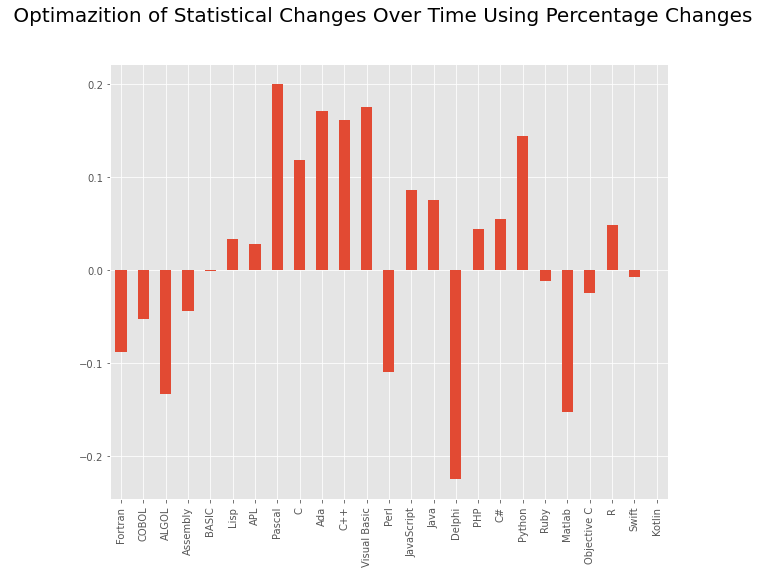

In [26]:
#calculates the percentage change between two index values
plt.suptitle(" Optimazition of Statistical Changes Over Time Using Percentage Changes",fontsize=20)
dataset2.pct_change().mean().plot(kind='bar',figsize=(10,8))

In [27]:
popular1 = pd.DataFrame({"Languages": dataset.iloc[197].T.index,
                            "Popularity": dataset.iloc[197].values.T})

popular2 = pd.DataFrame({"Languages": dataset2.iloc[54].T.index,
                            "Popularity": dataset2.iloc[54].values.T})

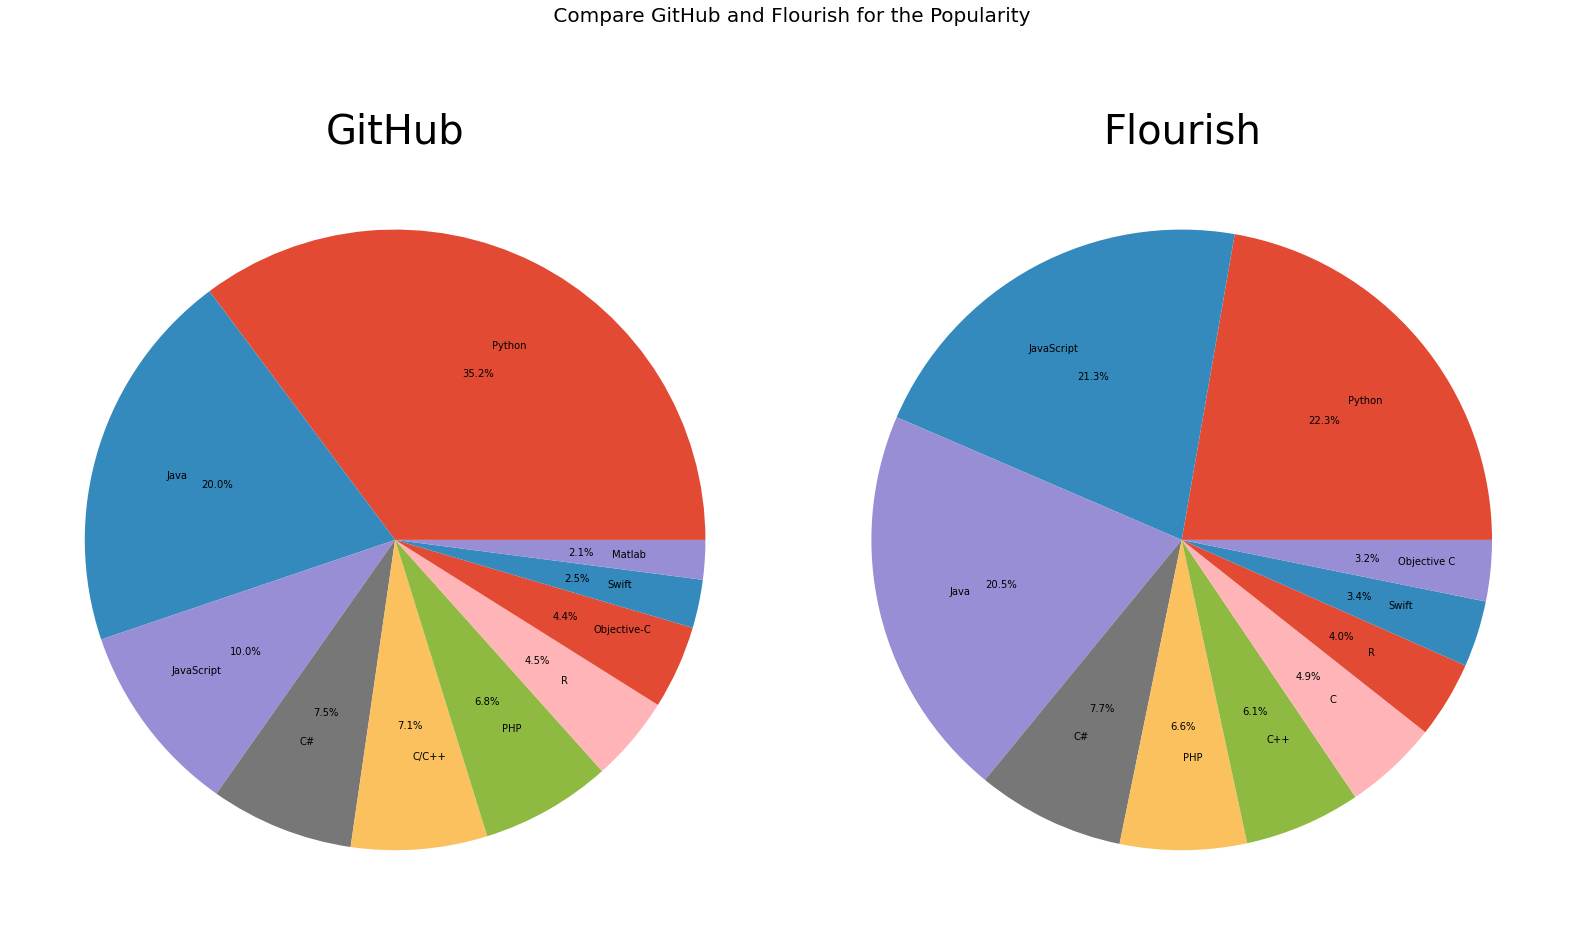

In [28]:
fig, ax = plt.subplots(1,2, figsize=(22,15))
plt.suptitle(" Compare GitHub and Flourish for the Popularity",fontsize=20)

ax[0].pie(popular1.nlargest(10,"Popularity").Popularity.values, autopct='%1.1f%%',
            labels=popular1.nlargest(10,"Popularity").Languages.values, labeldistance=0.7)
ax[0].set_title("GitHub",fontsize=40)

ax[1].pie(popular2.nlargest(10,"Popularity").Popularity.values, autopct='%1.1f%%',
            labels=popular2.nlargest(10,"Popularity").Languages.values, labeldistance=0.7)
ax[1].set_title("Flourish",fontsize=40)

plt.tight_layout()
plt.show()

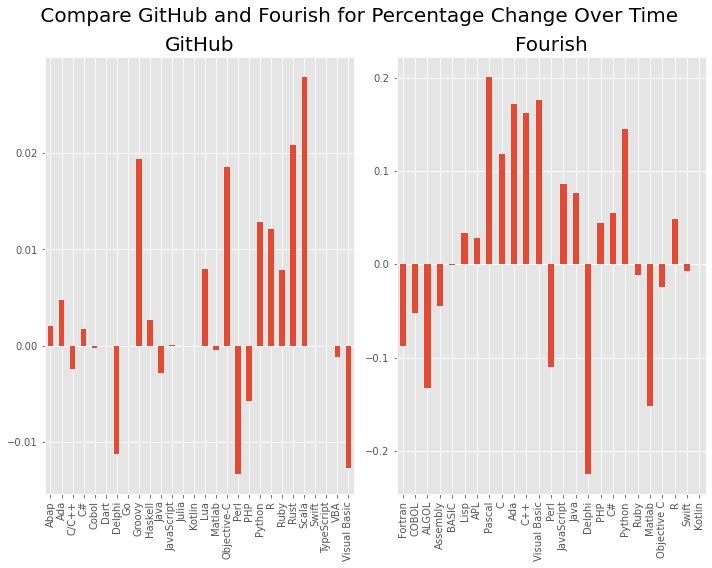

In [31]:
#calculates the percentage change between two index values
#fig, ac = plt.subplots(1,2, figsize=(18,15))
plt.suptitle(" Compare GitHub and Fourish for Percentage Change Over Time",fontsize=20)

plt.subplot(1, 2, 1)
plt.title("GitHub",fontsize=20)
dataset.pct_change().mean().plot(kind='bar',figsize=(10,10))

plt.subplot(1, 2, 2)
plt.title("Fourish",fontsize=20)
dataset2.pct_change().mean().plot(kind='bar',figsize=(10,8))

plt.tight_layout()
plt.show()




In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [33]:
dataset3 = pd.read_csv("data/Operating System.csv")
dataset3.head()

,Year,Windows,Linux,MacOS
0,2011,66.1390,18.2239,15.6371
1,2012,61.0382,20.1275,18.8342
2,2013,58.4323,21.0651,20.5026
3,2014,59.5070,21.5401,18.9528
4,2015,56.5332,21.2329,22.2338


In [34]:
dataset3.shape

(10, 4)

In [35]:
dataset3.dtypes

Year         int64
Windows    float64
Linux      float64
MacOS      float64
dtype: object

In [36]:
dataset3["Year"] = pd.to_datetime(dataset3["Year"])
dataset3.set_index("Year", inplace=True)
dataset3

,Windows,Linux,MacOS
Year,,,
1970-01-01 00:00:00.000002011,66.1390,18.2239,15.6371
1970-01-01 00:00:00.000002012,61.0382,20.1275,18.8342
1970-01-01 00:00:00.000002013,58.4323,21.0651,20.5026
1970-01-01 00:00:00.000002014,59.5070,21.5401,18.9528
1970-01-01 00:00:00.000002015,56.5332,21.2329,22.2338
1970-01-01 00:00:00.000002016,52.1517,21.6917,26.1566
1970-01-01 00:00:00.000002017,45.3557,34.7423,19.9020
1970-01-01 00:00:00.000002018,49.5143,22.4501,28.0356
1970-01-01 00:00:00.000002019,47.4669,25.7842,26.7488


In [37]:
popular_2011 = pd.DataFrame({"Languages": dataset3.iloc[0].T.index,
                            "Popularity": dataset3.iloc[0].values.T})

popular_2020 = pd.DataFrame({"Languages": dataset3.iloc[9].T.index,
                            "Popularity": dataset3.iloc[9].values.T})

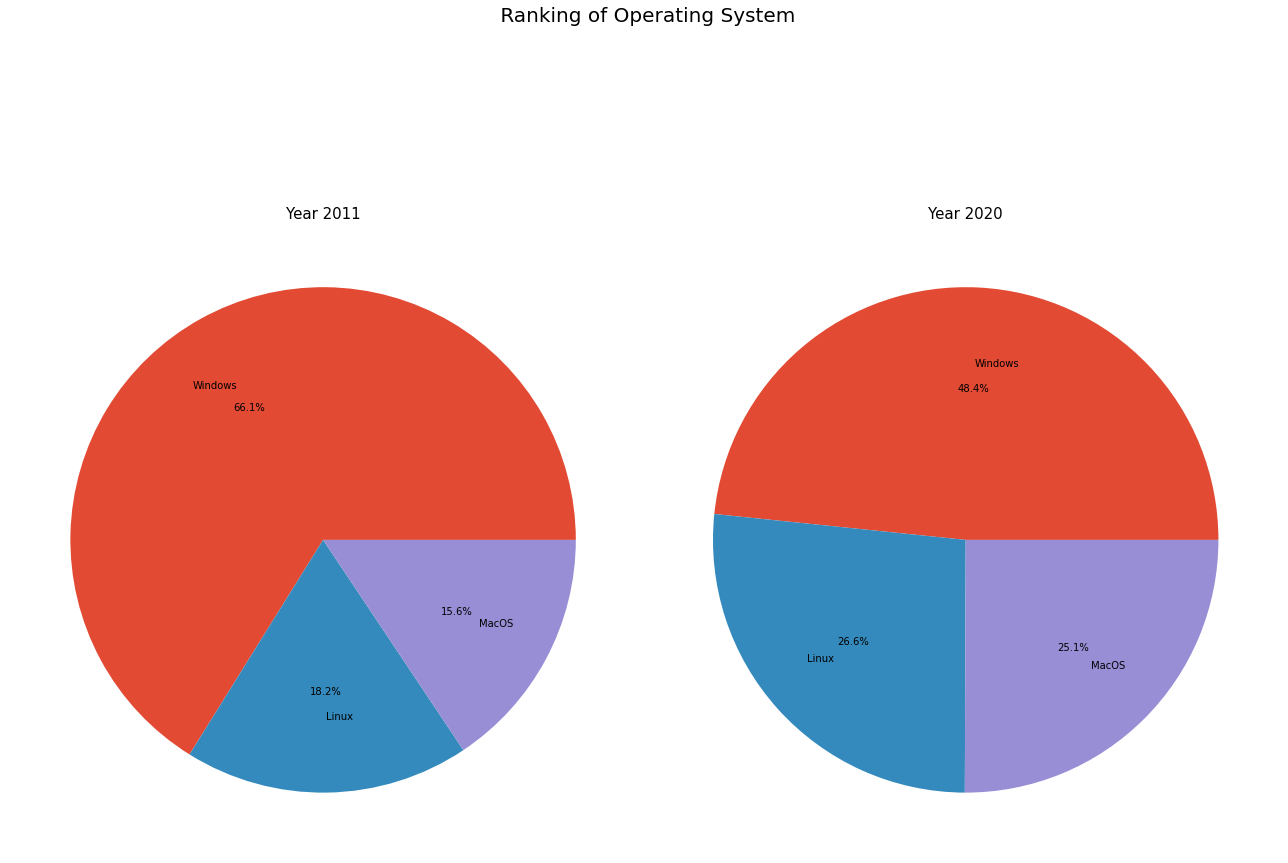

In [38]:
fig, ax = plt.subplots(1,2, figsize=(18,15))
plt.suptitle(" Ranking of Operating System",fontsize=20)

ax[0].pie(popular_2011.nlargest(10,"Popularity").Popularity.values, autopct='%1.1f%%',
            labels=popular_2011.nlargest(10,"Popularity").Languages.values, labeldistance=0.7)
ax[0].set_title("Year 2011",fontsize=15)

ax[1].pie(popular_2020.nlargest(10,"Popularity").Popularity.values, autopct='%1.1f%%',
            labels=popular_2020.nlargest(10,"Popularity").Languages.values, labeldistance=0.7)
ax[1].set_title("Year 2020",fontsize=15)

plt.tight_layout()
plt.show()

<AxesSubplot:>

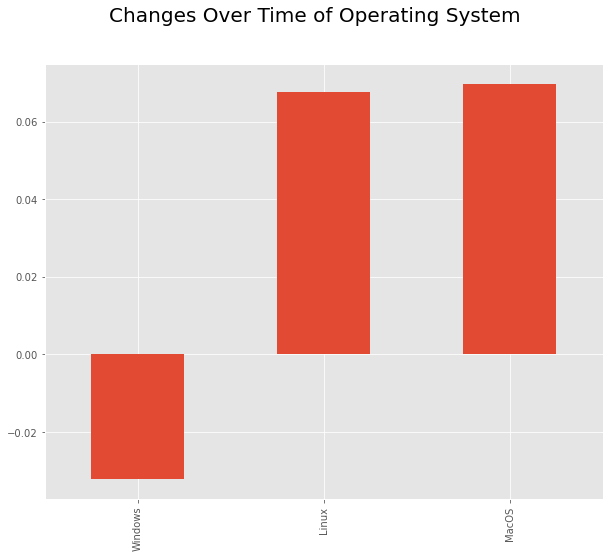

In [47]:
#calculates the percentage change between two index values
plt.suptitle("Changes Over Time of Operating System",fontsize=20)
dataset3.pct_change().mean().plot(kind='bar',figsize=(10,8))

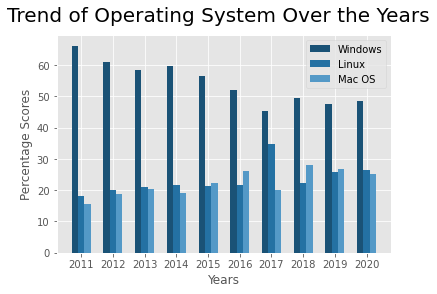

In [39]:
plt.suptitle("Trend of Operating System Over the Years",fontsize=20)
x = np.arange(10)
width = 0.2
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, dataset3.Windows, width, color='#1A5276')
plt.bar(x, dataset3.Linux, width, color='#2471A3')
plt.bar(x+0.2, dataset3.MacOS, width, color='#5499C7')
plt.xticks(x, ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])
plt.xlabel("Years")
plt.ylabel("Percentage Scores")
plt.legend(["Windows", "Linux", "Mac OS"])
plt.show()

In [40]:
dataset4 = pd.read_csv("data/Language and Operating System2.csv")
dataset4.head()

,Unnamed: 0,Windows,Linux,MacOS
0,Java,48.048251,26.919158,25.032592
1,Javascript,49.697015,23.144072,27.158913
2,R,55.298089,23.766592,20.935318
3,PHP,46.646769,27.375228,25.978003
4,Python,37.134903,36.333418,26.531680


In [41]:
dataset4.shape

(9, 4)

In [42]:
dataset4.dtypes

Unnamed: 0     object
Windows       float64
Linux         float64
MacOS         float64
dtype: object

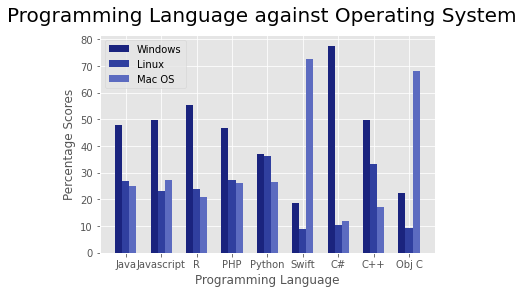

In [43]:
plt.suptitle("Programming Language against Operating System",fontsize=20)
x = np.arange(9)
width = 0.2
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, dataset4.Windows, width, color='#1A237E')
plt.bar(x, dataset4.Linux, width, color='#303F9F')
plt.bar(x+0.2, dataset4.MacOS, width, color='#5C6BC0')
plt.xticks(x, ['Java', 'Javascript', 'R', 'PHP', 'Python', 'Swift', 'C#', 'C++', 'Obj C'])
plt.xlabel("Programming Language")
plt.ylabel("Percentage Scores")
plt.legend(["Windows", "Linux", "Mac OS"])
plt.show()

In [44]:
dataset5 = pd.read_csv("data/Programming Language Stack Overflow2011 to 2020.csv")
dataset5.head()

,Year,Java,Javascript,R,PHP,Python,Swift,Chash,Cplus,ObjectiveC
0,2011,14.9316,24.5973,0.138576,13.6671,9.97748,0.00000,23.4367,12.83560,0.415728
1,2012,17.7484,23.6343,0.143559,14.5523,9.14998,0.00000,18.6551,11.53760,4.578770
2,2013,17.0418,26.7163,0.468212,13.1156,10.61090,0.00000,17.0813,9.57297,5.392900
3,2014,17.7358,27.0614,0.429092,12.2363,10.54140,0.00000,17.0135,10.14800,4.834440
4,2015,17.6138,25.6343,1.619950,13.9925,11.22610,1.62852,14.8924,9.70687,3.685610


In [45]:
dataset5.shape

(10, 10)

In [46]:
dataset5.dtypes

Year            int64
Java          float64
Javascript    float64
R             float64
PHP           float64
Python        float64
Swift         float64
Chash         float64
Cplus         float64
ObjectiveC    float64
dtype: object

<ipython-input-52-24918ec7e609>:18: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(x, ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])


<Figure size 432x288 with 0 Axes>

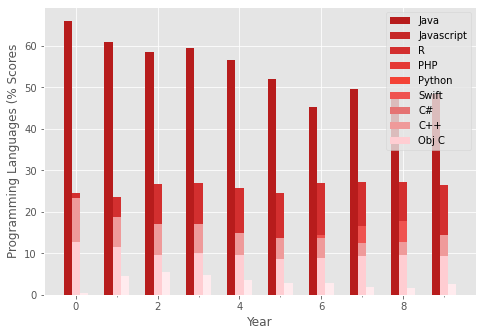

In [52]:
plt.suptitle("Trend of Programming Languages over the years (Stack Overflow [2011-2020])",fontsize=20)
x = np.arange(10)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
width = 0.2
  
# plot data in grouped manner of bar type
ax.bar(x-0.2, dataset3.Windows, width, color='#B71C1C')
ax.bar(x, dataset5.Java, width, color='#C62828')
ax.bar(x, dataset5.Javascript, width, color='#D32F2F')
ax.bar(x, dataset5.R, width, color='#E53935')
ax.bar(x, dataset5.PHP, width, color='#F44336')
ax.bar(x, dataset5.Python, width, color='#EF5350')
ax.bar(x, dataset5.Swift, width, color='#E57373')
ax.bar(x, dataset5.Chash, width, color='#EF9A9A')
ax.bar(x, dataset5.Cplus, width, color='#FFCDD2')
ax.bar(x+0.2, dataset5.ObjectiveC, width, color='#FFEBEE')
ax.set_xticks(x, ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])
ax.set_xlabel("Year")
ax.set_ylabel("Programming Languages (% Scores")
ax.legend(['Java', 'Javascript', 'R', 'PHP', 'Python', 'Swift', 'C#', 'C++', 'Obj C'])
plt.show()